In [1]:
#Google PlayStore Dataset Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# the above line invokes a backend inline which stores the plot and makes sure it is displayed right below the code

psdata_ = pd.read_csv('Data/googleplaystore.csv')

psdata = psdata_.fillna(0)

# psdata_clean.head(50) 
# #type(psdata_clean["Size"][0])

In [3]:
#Question 1
#Find category having maximum no of apps, use a bar chart to prove your finding

In [4]:
#Getting all unique categories
psdata['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [5]:
# '1.9' is not a category. Checking which rows have this category 
psdata[psdata['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,0,"February 11, 2018",1.0.19,4.0 and up,0


In [6]:
# Dropping the row with the category '1.9'
psdata_clean_category = psdata.drop(psdata[psdata['Category'] == '1.9'].index)

#Seeing that row is deleted
# psdata_clean_category[psdata_clean_category['Category'] == '1.9']

In [7]:
#grouping apps by categories
psdata_clean_category_grp = psdata_clean_category.groupby('Category')

# psdata_clean_category_grp.first()

psdata_clean_category_grp_count = psdata_clean_category_grp.count()
psdata_clean_category_grp_count

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
ART_AND_DESIGN,65,65,65,65,65,65,65,65,65,65,65,65
AUTO_AND_VEHICLES,85,85,85,85,85,85,85,85,85,85,85,85
BEAUTY,53,53,53,53,53,53,53,53,53,53,53,53
BOOKS_AND_REFERENCE,231,231,231,231,231,231,231,231,231,231,231,231
BUSINESS,460,460,460,460,460,460,460,460,460,460,460,460
COMICS,60,60,60,60,60,60,60,60,60,60,60,60
COMMUNICATION,387,387,387,387,387,387,387,387,387,387,387,387
DATING,234,234,234,234,234,234,234,234,234,234,234,234
EDUCATION,156,156,156,156,156,156,156,156,156,156,156,156


In [8]:
#finding category with max apps

category_with_max_apps = psdata_clean_category_grp.size().idxmax()
print ("Category with maximum number of apps is :", end =" ")
print(category_with_max_apps)

Category with maximum number of apps is : FAMILY


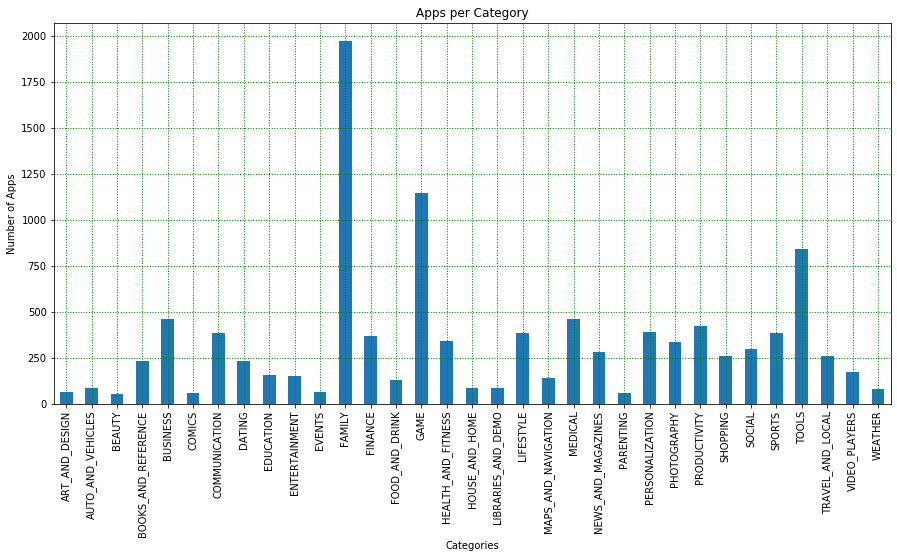

In [9]:
#Displaying no of apps for each category using a bar graph

apps_per_category = psdata_clean_category_grp_count["App"]

# print(type(apps_per_category))
# print(apps_per_category)

apps_per_category.plot(kind = 'bar',figsize = (15,7))

#Giving name to our plot
plt.title("Apps per Category")

#Naming the axes 
plt.xlabel("Categories")
plt.ylabel("Number of Apps")

plt.grid(linestyle=':',linewidth='1', color='green')


#Showing what we have plotted
plt.show()

In [10]:
#Question 2
#Find top 5 largest apps in given dataset having installs greater than 1 million

In [11]:
#Cleaning the size column - suffixes(K,M) to nummbers
psdata_clean_size = psdata_clean_category

def suffix_to_num(string):
    if string[-1].isdigit(): #no suffix
        return int(string)
    elif string[-1] == 'K':
        return int(float(string[0:-1]) * 1000)
    elif string[-1] == 'M':
        return int(float(string[0:-1]) * 1000000)

psdata_clean_size["Size"] = psdata_clean_size.Size.apply(suffix_to_num)
psdata_clean_size

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9500000.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
#Cleaning the installs column - removing commas and plus sign
psdata_clean_size_installs = psdata_clean_size

def refine_string(string):
    string = string.replace(',' , '')
    string = string.replace('+' , '')
    return int(string)

psdata_clean_size_installs["Installs"] = psdata_clean_size_installs.Installs.apply(refine_string)
psdata_clean_size_installs

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9500000.0,1000,Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
psdata_million_installs = psdata_clean_size_installs[psdata_clean_size_installs['Installs'] >= 1000000]
psdata_million_installs

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28000000.0,1000000,Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10797,Fuel Rewards® program,LIFESTYLE,4.6,32433,46000000.0,1000000,Free,0,Everyone,Lifestyle,"June 26, 2018",2.9.1,5.0 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81000000.0,1000000,Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24000000.0,1000000,Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [14]:
psdata_million_installs.nlargest(5,['Size'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449,100000000.0,1000000,Free,0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000,Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9,4.0 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000,Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up


In [15]:
# Question 3
# Find out popular app which is updated before 2016. Popularity is based on no of installs

In [16]:
#Cleaning date and time
psdata_clean_csi_time = psdata_clean_size_installs
psdata_clean_csi_time['Last Updated'] = pd.to_datetime(psdata_clean_size_installs['Last Updated'])
psdata_clean_csi_time
#psdata_clean_csi_time has clean category,size,installs and time fields

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0,Everyone,Education,2018-07-06,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9500000.0,1000,Free,0,Everyone,Medical,2017-01-20,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [17]:
#Apps updated before 2016
psdata_apps_upbefore_2016 = psdata_clean_csi_time[psdata_clean_csi_time['Last Updated'] < '2016-01-01']
psdata_apps_upbefore_2016

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,NaN,100000,Free,0,Everyone,Auto & Vehicles,2014-08-26,1.0.1,2.2 and up
144,Cool Reader,BOOKS_AND_REFERENCE,4.5,246315,NaN,10000000,Free,0,Everyone,Books & Reference,2015-07-17,Varies with device,1.5 and up
170,Flybook,BOOKS_AND_REFERENCE,3.9,1778,4900000.0,500000,Free,0,Mature 17+,Books & Reference,2014-10-16,1.0.3,2.1 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,0.0,114,7300000.0,100000,Free,0,Everyone,Books & Reference,2015-08-07,1.1,5.1 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,NaN,100000,Free,0,Everyone,Business,2015-09-11,3.0.1.11 (Build 311),2.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817,HTC Sense Input - FR,TOOLS,4.0,885,8000000.0,100000,Free,0,Everyone,Tools,2015-10-30,1.0.612928,5.0 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2300000.0,100000,Free,0,Everyone,News & Magazines,2014-01-20,1.5,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,NaN,100000,Free,0,Everyone,Weather,2014-02-16,6,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,NaN,1000,Free,0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up


In [18]:
pop_app_before_2016_index = psdata_apps_upbefore_2016['Installs'].idxmax()

print(psdata_apps_upbefore_2016.loc[pop_app_before_2016_index])

App                         Smash Hit
Category                         GAME
Rating                            4.5
Reviews                       4147718
Size                          7.9e+07
Installs                    100000000
Type                             Free
Price                               0
Content Rating               Everyone
Genres                         Arcade
Last Updated      2015-11-26 00:00:00
Current Ver                     1.4.0
Android Ver                2.3 and up
Name: 4059, dtype: object


In [19]:
print ("Popular app which is updated before 2016 is :", end =" ")
print(psdata_apps_upbefore_2016.loc[pop_app_before_2016_index , 'App'])

Popular app which is updated before 2016 is : Smash Hit


In [20]:
#Question 4
#Find out most installed category

In [21]:
psdata_clean_csi_time_grp = psdata_clean_csi_time.groupby('Category').sum()

psdata_clean_csi_time_grp

,Rating,Size,Installs
Category,,,
ART_AND_DESIGN,270.2,7.670000e+08,124338100
AUTO_AND_VEHICLES,305.9,1.501700e+09,53130211
BEAUTY,179.7,6.484000e+08,27197050
BOOKS_AND_REFERENCE,773.6,2.616900e+09,1921469576
BUSINESS,1248.8,5.784000e+09,1001914865
COMICS,241.0,6.867000e+08,56086150
COMMUNICATION,1364.0,3.106500e+09,32647276251
DATING,774.3,3.524600e+09,264310807
EDUCATION,680.3,2.306700e+09,871452000


In [22]:
print ("Most installed category is :", end =" ")
print(psdata_clean_csi_time_grp['Installs'].idxmax())


Most installed category is : GAME


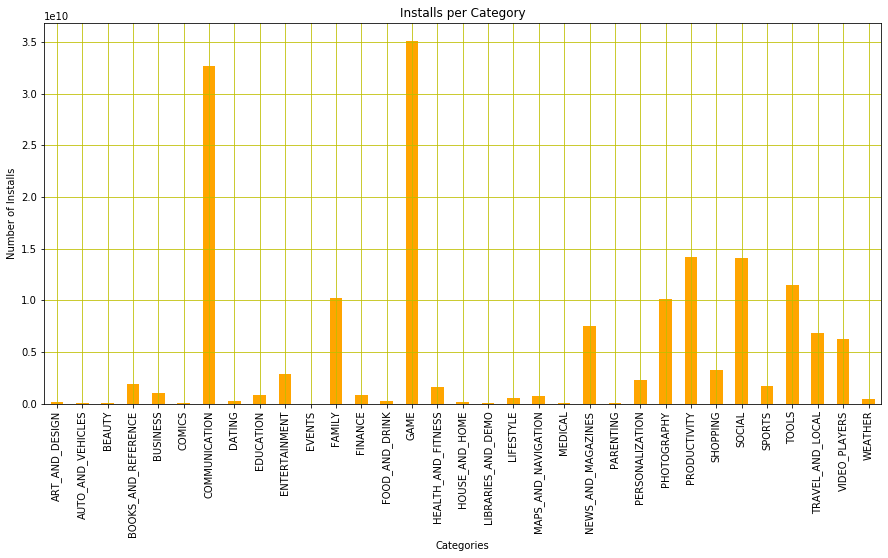

In [23]:
#Displaying no of INSTALLS for each category using a bar graph

installs_per_category = psdata_clean_csi_time_grp['Installs']

installs_per_category.plot(kind = 'bar', figsize = (15,7) , color = 'orange')

#Giving name to our plot
plt.title("Installs per Category")
#Naming the axes 
plt.xlabel("Categories")
plt.ylabel("Number of Installs")

plt.grid(True,color='y')

#Showing what we have plotted
plt.show()

In [24]:
#Question 5
#How do the app ratings differ between paid and free apps in general?

In [25]:
#dividing all apps into 2 categories: free and not free

psdata_clean_csi_time['Type'].unique()

array(['Free', 'Paid', 0], dtype=object)

In [30]:
#checking which apps have type as nan(which we replaced before with 0)
psdata_clean_csi_time[psdata_clean_csi_time['Type'] == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,0.0,0,NaN,0,0,0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [31]:
#dropping row with type nan
psdata_clean_csit_type = psdata_clean_csi_time.drop(psdata_clean_csi_time[psdata_clean_csi_time['Type'] == 0].index)

# psdata_clean_csit_type[psdata_clean_csit_type['Type'].isnull()]   #checking if row is deleted

In [32]:
psdata_clean_csit_type_grp = psdata_clean_csit_type.groupby('Type').mean()
psdata_clean_csit_type_grp
# psdata_clean_csi_time_grp = psdata_clean_csi_time.groupby('Category').sum()



,Rating,Size,Installs
Type,,,
Free,3.635770,2.234576e+07,1.669095e+07
Paid,3.450625,2.133028e+07,9.119510e+04


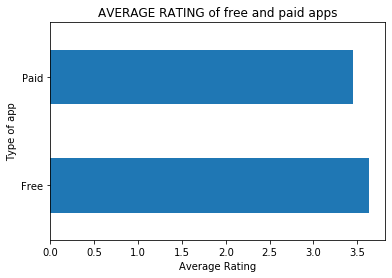

In [34]:
#Displaying AVERAGE RATING of free and paid apps using a bar graph

free_vs_paid_rating = psdata_clean_csit_type_grp['Rating']

free_vs_paid_rating.plot(kind = 'barh')

#Giving name to our plot
plt.title("AVERAGE RATING of free and paid apps")
#Naming the axes 
plt.xlabel("Average Rating")
plt.ylabel("Type of app")

# plt.grid(True)

#Showing what we have plotted
plt.show()